### VD A.1:

Data:

In [52]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(2)
X_train = np.array([0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50,2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50])
y_train = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])
X_test = np.array([2.45, 1.85, 3.75, 3.21, 4.05])

In [53]:
def find_k_nearest(value, X_train, k):
    dist = abs(X_train - value)
    return np.argsort(dist)[:k]

In [55]:
def predict(X_test, k):
    y_pred = np.zeros(len(X_test))
    for i in range(len(X_test)):
        indexes = find_k_nearest(X_test[i], X_train, k)
        probs = np.mean([y_train[idx] for idx in indexes])
        if probs >= 0.5:
            y_pred[i] = 1
    return y_pred
print('k=3:')
print(predict(X_test, 3))
print('k=4:')
print(predict(X_test, 4))
print('k=5:')
print(predict(X_test, 5))

k=3:
[1. 0. 1. 0. 1.]
k=4:
[1. 0. 1. 1. 1.]
k=5:
[0. 0. 1. 0. 1.]


### VD A.2:

Data:

In [66]:
import numpy as np
import pandas as pd

data = pd.read_csv('vidu4_lin_reg.txt', delimiter=' ')
data['TYPE'] = np.where(data['BEDAYNTM'] >= 1.0, 1.0, 0.0)
data.drop(['ID', 'BEDAYNTM'], inplace=True, axis=1)
data.head()

,TUOI,BMI,HA,GLUCOSE,CHOLESTEROL,TYPE
0,56,21,160,14.0,6.00,1.0
1,76,18,150,12.0,4.97,1.0
2,63,16,160,4.4,6.39,0.0
3,78,20,100,4.0,7.00,1.0
4,87,20,110,4.6,4.10,1.0


In [67]:
X_train, y_train = data.iloc[:80, :-1].to_numpy(), data.iloc[:80, -1].to_numpy()
X_test, y_test = data.iloc[80:, :-1].to_numpy(), data.iloc[80:, -1].to_numpy()

In [68]:
def find_k_nearest(value, X_train, k):
    dist = np.zeros(len(X_train))
    for i in range(len(X_train)):
        dist[i] = np.linalg.norm(value - X_train[i], ord=2)
    return np.argsort(dist)[:k]

In [73]:
def predict(X_test, X_train, k):
    y_pred = np.zeros(len(X_test))
    for i in range(len(X_test)):
        indexes = find_k_nearest(X_test[i], X_train, k)
        probs = np.mean([y_train[idx] for idx in indexes])
        if probs >= 0.5:
            y_pred[i] = 1
    return y_pred
y_pred8 = predict(X_test, X_train, k=8)
y_pred9 = predict(X_test, X_train, k=9)

Evaluate:

In [74]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print('k=8')
print(f'Acc: {accuracy_score(y_test, y_pred8)}')
print(f'Precision: {precision_score(y_test, y_pred8)}')
print(f'Recall: {recall_score(y_test, y_pred8)}')
print('\n')
print('k=9')
print(f'Acc: {accuracy_score(y_test, y_pred9)}')
print(f'Precision: {precision_score(y_test, y_pred9)}')
print(f'Recall: {recall_score(y_test, y_pred9)}')

k=8
Acc: 0.8
Precision: 0.7272727272727273
Recall: 0.8888888888888888


k=9
Acc: 0.65
Precision: 0.625
Recall: 0.5555555555555556


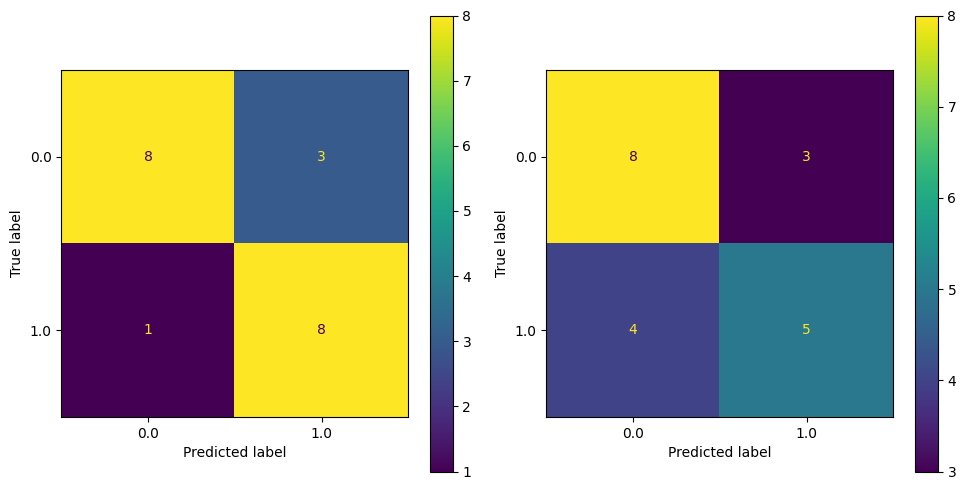

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred8, ax=axes[0])
ConfusionMatrixDisplay.from_predictions(y_test, y_pred9, ax=axes[1])
plt.tight_layout()  
plt.show()